<a href="https://colab.research.google.com/github/cinnamonrom/DS_I/blob/main/RN_REGRESOR_AUTO_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
# https://www.tensorflow.org/tutorials/keras/regression?hl=es-419
'''
HAREMOS UNA REGRESIÓN SOBRE LA CARACTERÍSTICA 'MPG' (MILLAS X GALÓN) PARA
DISTINTOS VEHÍCULOS Y VEREMOS CÓMO SE COMPORTA EL MODELO DE RED NEURONAL
'''
!pip install tensorflow


2.15.0


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
#  Descargar archivo de datos
# Hay varias maneras de hacerlo: 1) se puede descargar a la PC y desde ahí cargarlo en dataframe de Pandas
# O, leerlo directamente desde la URL y cargarlo en un dataframe usando Pandas
# Primer paso para 1)
# dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

dataset_url="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


In [ ]:
#from google.colab import files     # NO CORRER, sólo de muestra
#files.upload()

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



In [ ]:
# CARGAR DATASET DIRECTO A DATAFRAME DE PANDAS, COPIAR Y VERLO
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_url, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(dataset['MPG']))

<class 'pandas.core.series.Series'>


In [ ]:
# HAY VALORES AUSENTES?
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
# MÁS INFORMACIÓN CON OTRO MÉTODO DE PANDAS
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
# ELIMINAR COLUMNAS CON VALORES AUSENTES
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
data=dataset.copy()
data.dropna(axis=1, inplace=True)

In [ ]:
data

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,1
394,44.0,4,97.0,2130.0,24.6,82,2
395,32.0,4,135.0,2295.0,11.6,82,1
396,28.0,4,120.0,2625.0,18.6,82,1


In [ ]:
# CORTAR COLUMNA CATEGÓRICA PARA 'EXPRESAR' SUS CATEGORÍAS
origin = data.pop('Origin')

In [ ]:
# REDEFINIR COLUMNA DE 'ORIGEN' EN EL DATASET COMO CATEGORÍAS
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20% USANDO PANDAS PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
test_dataset

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,2228.0,14.0,71,0.0,0.0,1.0
32,25.0,4,98.0,2046.0,19.0,71,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,2640.0,18.6,82,1.0,0.0,0.0
370,31.0,4,112.0,2575.0,16.2,82,1.0,0.0,0.0
382,34.0,4,108.0,2245.0,16.9,82,0.0,0.0,1.0
384,32.0,4,91.0,1965.0,15.7,82,0.0,0.0,1.0


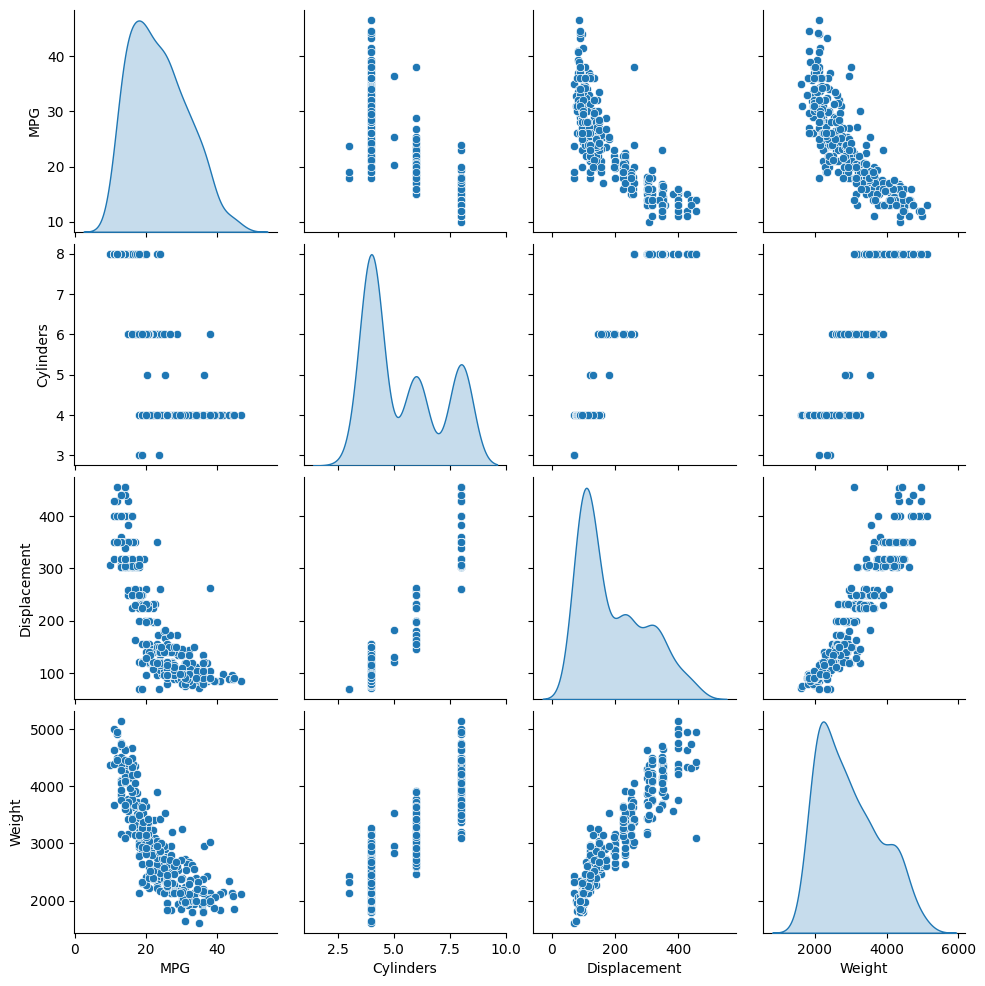

In [ ]:
# VEAMOS UN POCO LA DISTRIBUCIÓN CONJUNTA DE ALGUNAS DE LAS CARACTERÍSTICAS DEL DATASET
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# VER LOS ESTADÍSTICOS (CÓMODAMENTE) DEL DATASET SIN LA COLUMNA TARGET 'MPG'
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


In [ ]:
# CORTAR LA CARACTERÍSTICA 'MPG' DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
# DEFINIR FUNCIÓN PARA ESTANDARIZAR VARIABLES -> LA VARIABLE NORMALIZADA TIENE DISTRIBUCIÓN GAUSSIANA
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data

,Cylinders,Displacement,Weight,Acceleration,Model Year,USA,Europe,Japan
65,1.528471,1.521380,1.379315,-0.928344,-1.065117,0.746369,-0.441445,-0.491351
132,-0.848320,-0.511125,-0.499348,0.502127,-0.525344,0.746369,-0.441445,-0.491351
74,1.528471,1.049377,1.574639,0.144509,-1.065117,0.746369,-0.441445,-0.491351
78,-0.848320,-0.703780,0.017965,1.396171,-1.065117,-1.335607,2.258163,-0.491351
37,0.340075,0.375086,0.383754,-0.034300,-1.335003,0.746369,-0.441445,-0.491351
...,...,...,...,...,...,...,...,...
207,-0.848320,-0.607453,0.220392,0.037224,0.014428,-1.335607,2.258163,-0.491351
279,-0.848320,-0.915700,-0.981147,0.359080,0.554200,-1.335607,-0.441445,2.028805
227,0.340075,0.307657,0.788608,0.752459,0.284314,0.746369,-0.441445,-0.491351
148,-0.848320,-0.742311,-0.849747,-0.570726,-0.525344,-1.335607,2.258163,-0.491351


In [ ]:
# CONSTRUIR EL MODELO: DEFINIR ARQUITECTURA DE LA RED Y PARÁMETROS RELEVANTES
# https://qastack.mx/stats/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
# https://keras.io/getting_started/

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
# INSTANCIAR MODELO
model = build_model()

In [ ]:
# COMPROBAR QUE SEA LO DESEADO
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# PROBAR EL FUNCIONAMIENTO DEL MODELO CON UNA PARTE PEQUEÑA DEL DATASET DE TRAIN
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 198ms/step


array([[-0.37501848],
       [-0.22202195],
       [-0.2909736 ],
       [ 0.3819707 ],
       [-0.2834181 ],
       [ 0.32371858],
       [ 0.22512788],
       [-0.27747878],
       [-0.4222151 ],
       [ 0.27889934]], dtype=float32)

In [ ]:
# DEFINIR FUNCIÓN PARA MOSTRAR EL AVANCE DEL ENTRENAMIENTO Y ENTRENARLO. DEMORA 1:30 MINUTOS APROX

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
history

In [ ]:
history.history

{'loss': [599.1784057617188,
  567.9528198242188,
  534.3385620117188,
  495.1042785644531,
  447.2676696777344,
  391.17083740234375,
  327.4688415527344,
  258.08868408203125,
  190.00331115722656,
  127.97953033447266,
  81.25444030761719,
  51.19028091430664,
  36.17806625366211,
  28.488525390625,
  23.983922958374023,
  20.31151008605957,
  18.25977897644043,
  16.42627716064453,
  15.458892822265625,
  14.704087257385254,
  14.115306854248047,
  13.555755615234375,
  13.030254364013672,
  12.699762344360352,
  12.329766273498535,
  11.989100456237793,
  11.701092720031738,
  11.457612991333008,
  11.188699722290039,
  10.963006973266602,
  10.751921653747559,
  10.553587913513184,
  10.389983177185059,
  10.246577262878418,
  10.077040672302246,
  9.895228385925293,
  9.759332656860352,
  9.595952033996582,
  9.476136207580566,
  9.411327362060547,
  9.345999717712402,
  9.162184715270996,
  9.107961654663086,
  8.971794128417969,
  8.880135536193848,
  8.805877685546875,
  8.76

In [ ]:
# VER UNA PARTE DEL HISTORIAL DEL ENTRENAMIENTO
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.335313,0.978639,2.335313,6.310955,1.782060,6.310955,995
996,2.393852,1.012035,2.393852,6.485866,1.794584,6.485866,996
997,2.394193,1.010626,2.394193,6.160019,1.782557,6.160019,997
998,2.499450,1.033122,2.499450,6.313210,1.785665,6.313210,998
999,2.425967,1.010190,2.425967,6.292484,1.790915,6.292484,999


In [ ]:
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,599.178406,23.189089,599.178406,581.843994,22.948421,581.843994,0
1,567.952820,22.509186,567.952820,548.886841,22.227852,548.886841,1
2,534.338562,21.769077,534.338562,511.142944,21.377491,511.142944,2
3,495.104279,20.857031,495.104279,466.251648,20.322485,466.251648,3
4,447.267670,19.713869,447.267670,413.111328,18.989399,413.111328,4


In [ ]:
type(history)

keras.src.callbacks.History

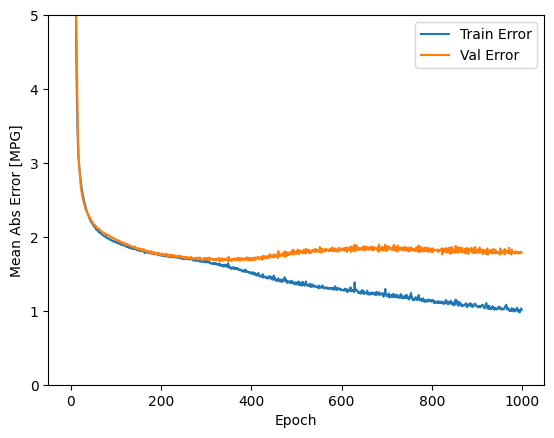

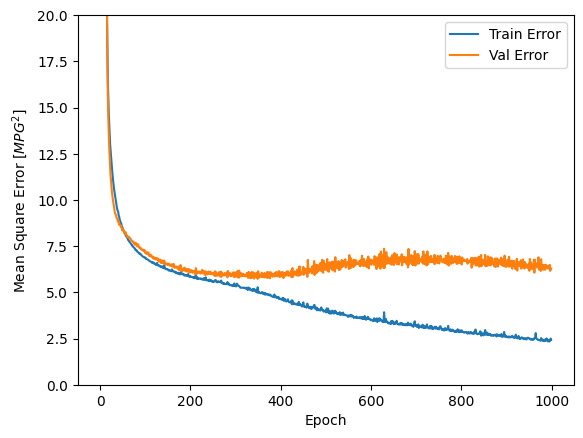

In [ ]:
# GRAFICAR LA EVOLUCIÓN DE LAS MÉTRICAS DEL MODELO VS ÉPOCAS (ITERACIONES)
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting

Para comprender mejor lo anterior, recomiendo este artículo


....................................................................................................
.................................................................

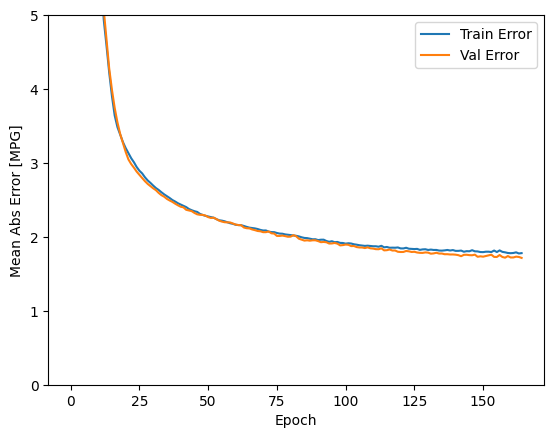

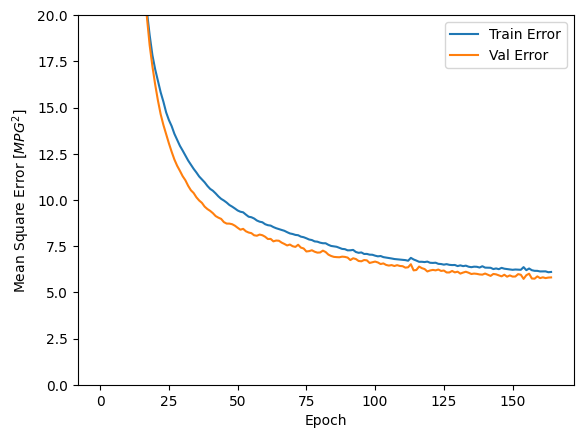

In [ ]:
# EL MODELO TERMINA TENDIENDO AL SOBREAJUSTE Y ESO ES MALO
# HAY QUE DETENERLO ANTES DE QUE COMIENCE A SOBREAJUSTAR Y USAR 'EARLY STOPPING'
# REINSTANCIAR MODELO Y AGREGAR EARLY STOPPING
# DEMORA MUCHO MENOS Y LOS RESULTADOS SON MEJORES

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
# CALCULAR Y MOSTRAR LAS MÉTRICAS USADAS PARA EVALUAR EL MODELO
# MÁS INFO ACÁ https://www.datup.ai/logistica/medidas-de-error-en-pronosticos-de-demanda/
# https://www.freecodecamp.org/espanol/news/aprendizaje-automatico-una-introduccion-al-error-cuadratico-medio-y-las-lineas-de-regresion/

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.5452 - mae: 1.9290 - mse: 6.5452 - 154ms/epoch - 51ms/step
Testing set Mean Abs Error:  1.93 MPG


3/3 [==============================] - 0s 4ms/step


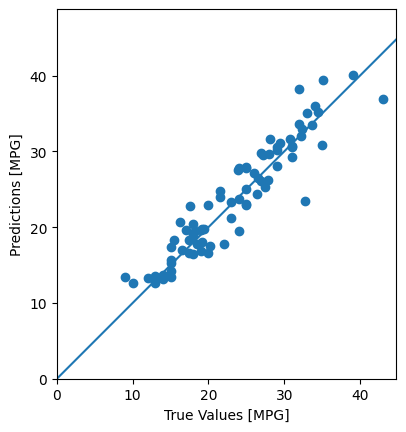

In [ ]:
# PREDECIR SOBRE EL DATASET DE TESTEO Y GRAFICAR PREDICCIONES VS VALORES REALES
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
test_predictions

array([15.710543, 12.644578, 13.388546, 22.918674, 25.005232, 13.528618,
       13.114127, 13.300212, 16.906244, 30.597387, 23.772764, 12.696516,
       14.230965, 21.229094, 26.148195, 13.529734, 13.705296, 12.975832,
       19.010801, 13.012018, 13.381199, 30.1623  , 22.877863, 15.337775,
       19.563719, 17.405386, 33.681007, 27.865831, 29.29024 , 16.403986,
       16.630602, 27.806444, 20.402414, 23.343243, 23.019495, 27.90377 ,
       27.185337, 17.758558, 19.504416, 28.099052, 30.63845 , 18.352564,
       31.066332, 16.966326, 24.802076, 23.926823, 36.952324, 17.4557  ,
       19.800196, 18.088322, 16.569706, 25.30551 , 27.529505, 20.724539,
       19.570837, 19.486364, 18.293236, 19.750963, 17.792192, 24.428614,
       31.980911, 26.264797, 23.517828, 30.796234, 32.92737 , 29.486822,
       40.101765, 39.467766, 35.14318 , 35.02133 , 33.445835, 31.587774,
       31.682247, 26.53254 , 22.848536, 29.836874, 30.75012 , 36.03918 ,
       38.271317, 29.653849], dtype=float32)

In [ ]:
test_labels

,MPG
9,15.0
25,10.0
28,9.0
31,25.0
32,25.0
...,...
368,27.0
370,31.0
382,34.0
384,32.0


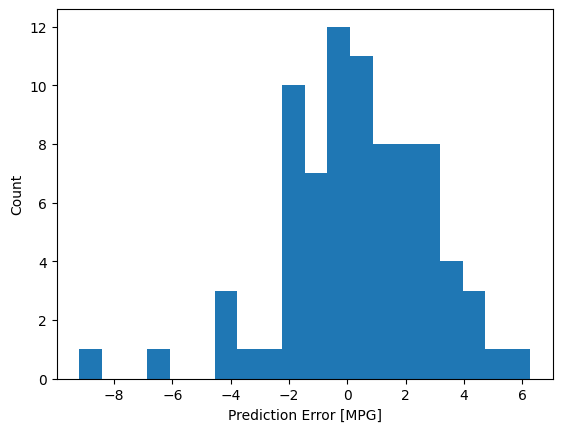

In [ ]:
# VER DISTRIBUCIÓN DE ERRORES DE PREDICCIÓN
# CUANTO MÁS 'GAUSSIANO', MEJOR
error = test_predictions - test_labels
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
# AHORA CON SKLEARN
'''
class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
 *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',
 learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
 early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
  n_iter_no_change=10, max_fun=15000)
  class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu',
   *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',
   learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
    epsilon=1e-08, n_iter_no_change=10, max_fun=15000)'''

from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='adam', alpha=1e-3,
                     hidden_layer_sizes=(64,64), random_state=1, verbose=1, early_stopping=True, max_iter=1000, validation_fraction=0.2)

clf.fit(normed_train_data, train_labels)

Iteration 1, loss = 303.18163291
Validation score: -6.848297
Iteration 2, loss = 298.98511402
Validation score: -6.737870
Iteration 3, loss = 294.63993689
Validation score: -6.624284
Iteration 4, loss = 290.29363363
Validation score: -6.507577
Iteration 5, loss = 285.75719373
Validation score: -6.387739
Iteration 6, loss = 281.08263456
Validation score: -6.263220
Iteration 7, loss = 276.31667822
Validation score: -6.133749
Iteration 8, loss = 271.29033145
Validation score: -5.997958
Iteration 9, loss = 266.12912370
Validation score: -5.854964
Iteration 10, loss = 260.56149099
Validation score: -5.705088
Iteration 11, loss = 254.83646954
Validation score: -5.547640
Iteration 12, loss = 248.88894953
Validation score: -5.382626
Iteration 13, loss = 242.43775681
Validation score: -5.208850
Iteration 14, loss = 235.90991100
Validation score: -5.025835
Iteration 15, loss = 228.88086081
Validation score: -4.834534
Iteration 16, loss = 221.69692527
Validation score: -4.634170
Iteration 17, los

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64),
             max_iter=1000, random_state=1, validation_fraction=0.2, verbose=1)

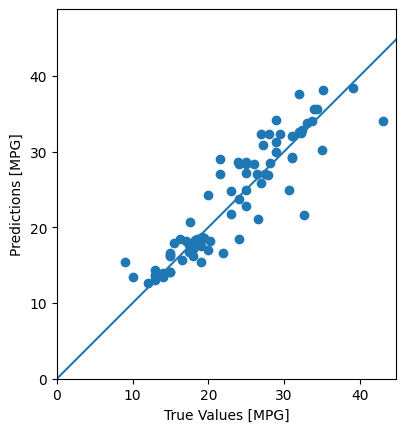

In [ ]:
# Como antes para comparar con los valores reales

test_predictions2=clf.predict(normed_test_data)

plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

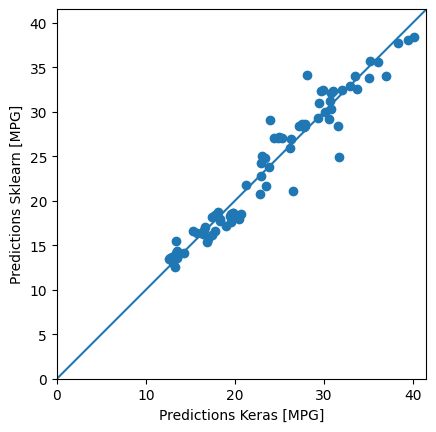

In [ ]:
plt.scatter(test_predictions, test_predictions2)
plt.xlabel('Predictions Keras [MPG]')
plt.ylabel('Predictions Sklearn [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])